<h2 style="text-align:center;">Welcome to the fifth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore patterns in data
* to perform categorical values encoding
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory05". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_05_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

<span style="color:#011f4b; font-size:16px;"><b>Label Encoder</b></span>

<span style="color:#011f4b">This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.
</span>

<span style="color:#011f4b"><b>Label Encoding in Python</b> can be achieved using <code>Sklearn Library</code>. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
<br/>
Example, </span>

<span style="color:#011f4b"> Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called <b>‘One-Hot Encoding’</b>. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.</span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [1]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("Titanic.csv")

<b>Inline</b> your matplotlib

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---

<b> Task 00 </b> Take the first look at your data

<p style="text-align:right; color:#1460AA;">+8
    points </p>

Think about the best way to discover your data at the first time. <br/> Read README file to understand the names of the columns

In [4]:
# Your code goes here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

---

<b> Task 01 </b> Hadling NaN values.

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Calculate and visualize how many NaN valueas are there in your dataset. Calculate the percentage of NaNs. Choose the way you will handle NaNs - how are you going to restore them.

How many NaNs do you have. Answer as a text

In [29]:
data_na = data.isna()
ctr=0
for i in range(data.shape[1]):
    ctr += data[str(data.iloc[:,i].name)].isna().sum()
    print("Name:",str(data.iloc[:,i].name),"Nans-amount:",data[str(data.iloc[:,i].name)].isna().sum())
print("Total:",ctr)


Name: PassengerId Nans-amount: 0
Name: Survived Nans-amount: 0
Name: Pclass Nans-amount: 0
Name: Name Nans-amount: 0
Name: Sex Nans-amount: 0
Name: Age Nans-amount: 177
Name: SibSp Nans-amount: 0
Name: Parch Nans-amount: 0
Name: Ticket Nans-amount: 0
Name: Fare Nans-amount: 0
Name: Cabin Nans-amount: 687
Name: Embarked Nans-amount: 2
Total: 866


What are the persentage of NaNs. Answer as a text or output of a code snippet

In [27]:
for i in range(data.shape[1]):
    percentage_is = (data[str(data.iloc[:,i].name)].isna().sum() *100)/len(data)
    print("Name:",str(data.iloc[:,i].name),"\nPercent missing:",percentage_is,'%')
    

Name: PassengerId 
Percent missing: 0.0 %
Name: Survived 
Percent missing: 0.0 %
Name: Pclass 
Percent missing: 0.0 %
Name: Name 
Percent missing: 0.0 %
Name: Sex 
Percent missing: 0.0 %
Name: Age 
Percent missing: 19.865319865319865 %
Name: SibSp 
Percent missing: 0.0 %
Name: Parch 
Percent missing: 0.0 %
Name: Ticket 
Percent missing: 0.0 %
Name: Fare 
Percent missing: 0.0 %
Name: Cabin 
Percent missing: 77.10437710437711 %
Name: Embarked 
Percent missing: 0.2244668911335578 %


What NaNs are you going to restore - Answer as a text

I will restore Age because it has the less percent of existing Nans
i will do it by Embarked and mean 


How will you restore NaNs (by filling with means? modes? medians? or another way) and why. Answer as a text

Restore the NaNs

In [2]:
# Your code goes here
#j = 0
#for i in range(data.shape[1]):
  #  if(data[str(data.iloc[:,i].name)].isnull().any() and str(data.iloc[:,i].name) == "Age"):
  #      dataNan = data[str(data.iloc[:,i].name)]
     #   while j < len(dataNan):
      #      embarked = data[data.Age == data.loc[j, 'Age']]
           
        #    data.loc[j, str(data.iloc[:, i].name)] = int(embarked[str(data.iloc[:, i].name)].sum()*0.1)
        #    j += 1
data['height'].fillna(data['height'].mean(),inplace = True)


NameError: name 'data' is not defined

In [226]:
# Your code goes here
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,59.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,41.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,46.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,63.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,59.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,0.0,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,14.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,34.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,54.0,0,1,231919,23.0000,NaN,S


---

<b> Task 02 </b> Cleaning data - dropping unrelevant data and outliers

<p style="text-align:right; color:#1460AA;">+15
    points </p>

What features are unrelevant? Why? Answer as a text

Dropping unrelevant data

In [10]:
# Your code goes here
data.drop('Cabin', axis=0, inplace = True)
data.head(20)

KeyError: "['Cabin'] not found in axis"

In [81]:
# Your code goes here
data.drop('Cabin', axis=1, inplace = True) #Dropping column that have more than 30% of NaNs values - Cabin.
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708


Detecting outliers

less than min - outliers
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: PassengerId, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: SibSp, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      Fal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750


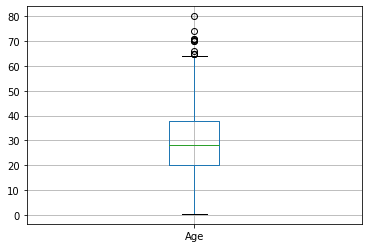

In [82]:
# Your code goes here
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
i = 0
j = 0
print('less than min - outliers')
while i < data.shape[1]:  
 if (data.iloc[:, i].dtype == 'int64' or data.iloc[:, i].dtype == 'float64'): 
  print(data[str(data.iloc[:, i].name)] < (Q1[str(data.iloc[:, i].name)] - (1.5 * IQR[str(data.iloc[:, i].name)])))
 i += 1 
print('----------------------------------------------------')   
print('more than max - outliers')
while j < data.shape[1]:  
 if (data.iloc[:, j].dtype == 'int64' or data.iloc[:, j].dtype == 'float64'): 
  print(data[str(data.iloc[:, j].name)] > (Q3[str(data.iloc[:, j].name)] + (1.5 * IQR[str(data.iloc[:, j].name)])))
 j += 1 
data.boxplot('Age')
data[data['Age']>65]  

248

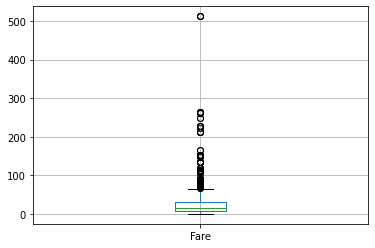

In [67]:
# Your code goes here
data.boxplot('Fare')
data[data['Fare']== data['Fare'].max()] 
data['Fare'].nunique()

Dropping outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750


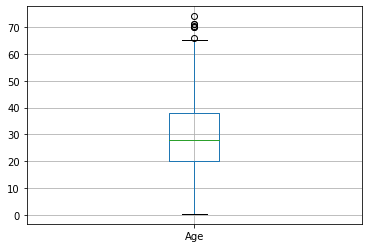

In [83]:
# Your code goes here
data.drop(data[data['Age'] == data['Age'].max()].index, axis=0, inplace = True)
data.boxplot('Age')
data[data['Age']>75]   

In [ ]:
# Your code goes here


---

<b> Task 03 </b> Data types

<p style="text-align:right; color:#1460AA;">+5
    points </p>

Identify what are your categorical data and numerical data. Answer as a text or as an output of code snippet

In [84]:
data_num = pd.DataFrame()
i = 0
j = 0
print('Numerical:')
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'int64' or data.iloc[:, i].dtype == 'float64'):
  print(j+1, '-', str(data.iloc[:, i].name))
  j += 1
 i += 1

Numerical:
1 - PassengerId
2 - Survived
3 - Pclass
4 - Age
5 - SibSp
6 - Parch
7 - Fare


In [85]:
data_num = pd.DataFrame()
i = 0
j = 0
print('Categorical:')
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'object'):
  print(j+1, '-', str(data.iloc[:, i].name))
  j += 1
 i += 1

Categorical:
1 - Name
2 - Sex
3 - Ticket


---

<b>Task 04</b> Data Visualization 

Use different ways to visualize your categorical and numerical data 

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Sex
female    233
male      109
Name: Survived, dtype: int64


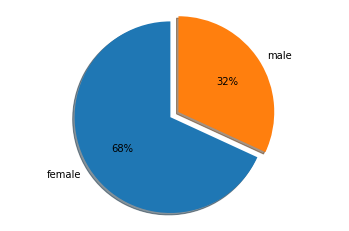

In [111]:
# Your code goes here
label = data.Sex.unique()
label = np.flip(label, 0)
br = data[(data.Survived == 1)] 
sizes = br.groupby('Sex')['Survived'].count()
print(sizes)
myexplode = [0, 0.1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=label, explode = myexplode, autopct='%1.0f%%',
        shadow=True, counterclock=True, startangle=90)
ax1.axis('equal')
plt.show()

c:\users\dushu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dushu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


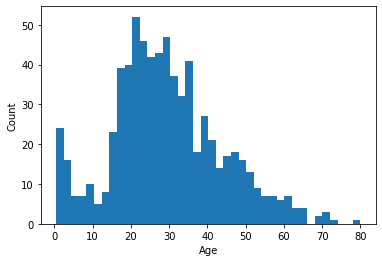

In [112]:
# Your code goes here
plt.hist(data.Age, density=False, bins=40)  
plt.ylabel('Count')
plt.xlabel('Age');

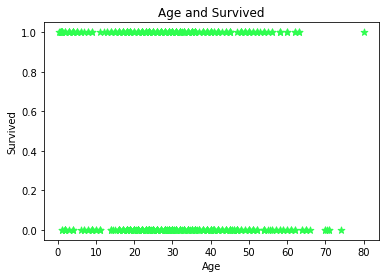

In [113]:
# Your code goes here
plt.scatter(data.Age, data.Survived, 50, marker = '*', color = '#2Ffd50')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age and Survived')
plt.show()

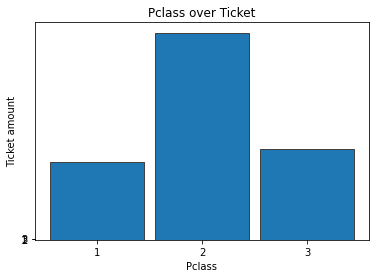

In [13]:
# Your code goes here
plt.bar(data.Pclass.unique(), data.groupby('Pclass')['Ticket'].count(), width = 0.9, ec='#414142')
plt.xlabel('Pclass')
plt.ylabel('Ticket amount')
plt.xticks(np.arange(1,4,1))
plt.yticks(np.arange(1,4,1))
plt.title('Pclass over Ticket')
plt.show()

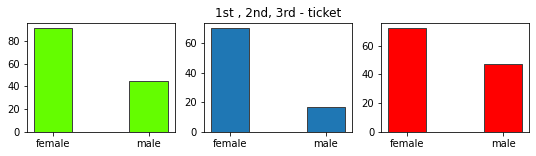

In [12]:
# Your code goes here
br1 = data[(data.Pclass == 1)] 
bg1 = data[(data.Pclass == 2)] 
bk1 = data[(data.Pclass == 3)]
br = br1[(br1.Survived == 1)] 
bg = bg1[(bg1.Survived == 1)]  
bk = bk1[(bk1.Survived == 1)] 
names = br.Sex.unique()
values = br.groupby('Sex')['Survived'].count()
Bvalues = bg.groupby('Sex')['Survived'].count()
Cvalues = bk.groupby('Sex')['Survived'].count()
plt.figure(figsize=(9, 2))
plt.subplot(131)
plt.bar(names, values, width = 0.4, 
color='#64fd00', ec='#414142')
plt.subplot(132)
plt.bar(names, Bvalues, width = 0.4, ec='#414142')
plt.title('1st , 2nd, 3rd - ticket')
plt.subplot(133)
plt.bar(names, Cvalues, width = 0.4,color='#ff0000', ec='#414142')
plt.show()

---

<b> Task 05 </b> Relationships in your data

More advanced statistical analysis aims to identify patterns in data, for example, whether there is a link between two variables, or whether certain groups are more likely to show certain attributes.
<br/> <br/> We often collect data so that we can find patterns in the data, like numbers trending upwards or correlations between two sets of numbers.
Depending on the data and the patterns, sometimes we can see that pattern in a simple tabular presentation of the data. 
<br/><br/>Other times, it helps to visualize the data in a chart, like a time series, line graph, or scatter plot - you can use your visualization from Task 04.
<br/><br/>You also use correlation coefficient here, check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) tutorial or [this](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) one, or [this](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) one

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\dushu\appdata\local\programs\python\python38-32\lib\site-packages
Requires: pandas, matplotlib, numpy, scipy
Required-by: 


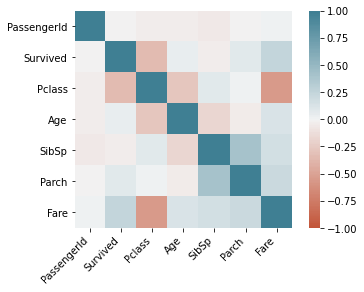

In [227]:
# Your code goes here
import seaborn as sns
!pip show seaborn
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

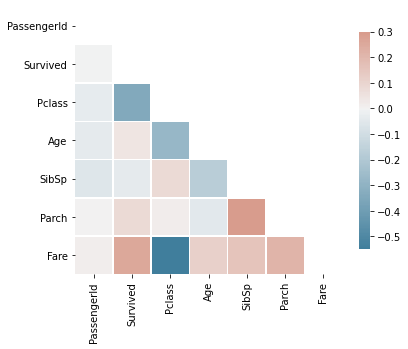

In [228]:
# Your code goes here
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# Your code goes here

In [15]:
# Your code goes here

In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

---

<b>Task 06 </b> Categorical Data encoding (This task can be done later, until the next class)

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Encode your categorical data

Use this [help](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) to perform Label Encoding and One-Hot Encoding on your categorical data

In [131]:
data_num = pd.DataFrame()
i = 0
j = 0
print('Categorical:')
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'object'):
  print(j+1, '-', str(data.iloc[:, i].name))
  j += 1
 i += 1

Categorical:
1 - Name
2 - Sex
3 - Ticket
4 - Cabin
5 - Embarked


In [132]:
NewDataName = pd.DataFrame()
NewDataName['Name'] = data['Name'].astype('category')
NewDataName['Name'] = NewDataName['Name'].cat.codes
NewDataName

,Name
0,108
1,190
2,353
3,272
4,15
...,...
886,548
887,303
888,413
889,81


In [133]:
NewDataSex = pd.DataFrame()
NewDataSex['Sex'] = data['Sex'].astype('category')
NewDataSex['Sex'] = NewDataSex['Sex'].cat.codes
NewDataSex

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [134]:
NewDataEmbarked = pd.DataFrame()
NewDataEmbarked['Embarked'] = data['Embarked'].astype('category')
NewDataEmbarked['Embarked'] = NewDataEmbarked['Embarked'].cat.codes
NewDataEmbarked

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


---

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 05
<br/> 

---